# EDA

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

In [41]:
total = pd.read_csv('total.csv')
total

,entid,cdate,tax_type_abnormal_0,tax_type_abnormal_1,tax_type_abnormal_2,tax_type_abnormal_3,tax_type_abnormal_4,tax_state_0,tax_state_1,tax_state_2,...,incometax_rate,collection_type,ASSGRO,LIAGRO,VENDINC,MAIBUSINC,PROGRO,NETINC,RATGRO,TOTEQU
0,722691858,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.166667,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,705310922,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.125000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,412086145,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.125000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1116571015,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.125000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,500970908,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.083333,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12274,1224096101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12275,466879194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12276,565888112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12277,348589037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
total['entid'].nunique()

12279

In [43]:
total.isnull().sum()

entid                      0
cdate                  11995
tax_type_abnormal_0    11995
tax_type_abnormal_1    11995
tax_type_abnormal_2    11995
                       ...  
MAIBUSINC              10253
PROGRO                 10339
NETINC                 10216
RATGRO                 10122
TOTEQU                 10310
Length: 146, dtype: int64

### Fill NaN in all dummy variables with 0
2-22, 33-42, 83-86

In [44]:
fillnadummy = []
for f in range(2,23):
    if f not in fillnadummy:
        fillnadummy.append(f)
for f in range(33,43):
    if f not in fillnadummy:
        fillnadummy.append(f)
for f in range(83,87):
    if f not in fillnadummy:
        fillnadummy.append(f)
# 2-22, 33-42, 83-86

In [45]:
for i in fillnadummy:
    (total.iloc[:,i]).fillna(0,inplace=True)
total

,entid,cdate,tax_type_abnormal_0,tax_type_abnormal_1,tax_type_abnormal_2,tax_type_abnormal_3,tax_type_abnormal_4,tax_state_0,tax_state_1,tax_state_2,...,incometax_rate,collection_type,ASSGRO,LIAGRO,VENDINC,MAIBUSINC,PROGRO,NETINC,RATGRO,TOTEQU
0,722691858,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.166667,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,705310922,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.125000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,412086145,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.125000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1116571015,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.125000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,500970908,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.083333,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12274,1224096101,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12275,466879194,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12276,565888112,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12277,348589037,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Find the max NaN in a single rows
result: max is 104 (not accepatble). 75%: 94

In [46]:
total['Null'] = total.isnull().sum(axis=1)
total

,entid,cdate,tax_type_abnormal_0,tax_type_abnormal_1,tax_type_abnormal_2,tax_type_abnormal_3,tax_type_abnormal_4,tax_state_0,tax_state_1,tax_state_2,...,collection_type,ASSGRO,LIAGRO,VENDINC,MAIBUSINC,PROGRO,NETINC,RATGRO,TOTEQU,Null
0,722691858,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50
1,705310922,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48
2,412086145,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49
3,1116571015,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52
4,500970908,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12274,1224096101,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103
12275,466879194,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103
12276,565888112,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103
12277,348589037,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103


In [47]:
total['Null'].describe()

count    12279.000000
mean        62.781660
std         23.685077
min         13.000000
25%         47.000000
50%         50.000000
75%         94.000000
max        104.000000
Name: Null, dtype: float64

### Drop rows with NaN values more than 90

In [48]:
total = total[total['Null'] <= 90]
total

,entid,cdate,tax_type_abnormal_0,tax_type_abnormal_1,tax_type_abnormal_2,tax_type_abnormal_3,tax_type_abnormal_4,tax_state_0,tax_state_1,tax_state_2,...,collection_type,ASSGRO,LIAGRO,VENDINC,MAIBUSINC,PROGRO,NETINC,RATGRO,TOTEQU,Null
0,722691858,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50
1,705310922,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48
2,412086145,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49
3,1116571015,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52
4,500970908,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,876340929,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55
12238,1202136378,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53
12248,117440828,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53
12257,609705973,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53


In [50]:
total = total.drop(columns=['Null'])
total

,entid,cdate,tax_type_abnormal_0,tax_type_abnormal_1,tax_type_abnormal_2,tax_type_abnormal_3,tax_type_abnormal_4,tax_state_0,tax_state_1,tax_state_2,...,incometax_rate,collection_type,ASSGRO,LIAGRO,VENDINC,MAIBUSINC,PROGRO,NETINC,RATGRO,TOTEQU
0,722691858,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.166667,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,705310922,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.125000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,412086145,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.125000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1116571015,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.125000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,500970908,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.083333,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,876340929,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12238,1202136378,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125000,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12248,117440828,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12257,609705973,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Fill NaN data

### Fill NaN in Number-counting columns with 0 (including dummy)
1-22, 27-28, 30-47, 50, 52-86, 88

In [51]:
fillna0 = []
for f in range(1,23):
    if f not in fillna0:
        fillna0.append(f)
for f in range(27,89):
    if (f != 29) and (f != 48) and (f != 49) and (f != 51) and (f != 87) and (f not in fillna0):
        fillna0.append(f)
# 1-22, 27-28, 30-47, 50, 52-86, 88

In [52]:
for i in fillna0:
    (total.iloc[:,i]).fillna(0,inplace=True)
total

,entid,cdate,tax_type_abnormal_0,tax_type_abnormal_1,tax_type_abnormal_2,tax_type_abnormal_3,tax_type_abnormal_4,tax_state_0,tax_state_1,tax_state_2,...,incometax_rate,collection_type,ASSGRO,LIAGRO,VENDINC,MAIBUSINC,PROGRO,NETINC,RATGRO,TOTEQU
0,722691858,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.166667,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,705310922,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.125000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,412086145,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.125000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1116571015,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.125000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,500970908,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.083333,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,876340929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12238,1202136378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125000,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12248,117440828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12257,609705973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
total.iloc[:,28].isnull().sum()

0

### Fill numberical variables with column mean
25-26, 29, 89-124, 130, 136, 138-145

In [54]:
fillnaMean = [130]
for f in range(24,30):
    if (f != 27) and (f != 28) and (f not in fillnaMean):
        fillnaMean.append(f)
for f in range(89,125):
    if f not in fillnaMean:
        fillnaMean.append(f)
for f in range(136,146):
    if (f != 137) and (f not in fillnaMean):
        fillnaMean.append(f)
# 25-26, 29, 89-124, 130, 136, 138-145

In [55]:
for i in fillnaMean:
    (total.iloc[:,i]).fillna((total.iloc[:,i]).mean(),inplace=True)
total

,entid,cdate,tax_type_abnormal_0,tax_type_abnormal_1,tax_type_abnormal_2,tax_type_abnormal_3,tax_type_abnormal_4,tax_state_0,tax_state_1,tax_state_2,...,incometax_rate,collection_type,ASSGRO,LIAGRO,VENDINC,MAIBUSINC,PROGRO,NETINC,RATGRO,TOTEQU
0,722691858,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.166667,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
1,705310922,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.125000,0.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
2,412086145,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.125000,0.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
3,1116571015,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.125000,0.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
4,500970908,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.083333,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,876340929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
12238,1202136378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125000,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
12248,117440828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125000,0.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
12257,609705973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461


### Fill categorical variables with -1
24, 131-135, 137

In [56]:
fillna1 = [24]
for f in range(131,138):
    if (f != 136) and (f not in fillna1):
        fillna1.append(f)
# 24, 131-135, 137

In [57]:
for i in fillna1:
    (total.iloc[:,i]).fillna(-1,inplace=True)
total

,entid,cdate,tax_type_abnormal_0,tax_type_abnormal_1,tax_type_abnormal_2,tax_type_abnormal_3,tax_type_abnormal_4,tax_state_0,tax_state_1,tax_state_2,...,incometax_rate,collection_type,ASSGRO,LIAGRO,VENDINC,MAIBUSINC,PROGRO,NETINC,RATGRO,TOTEQU
0,722691858,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.166667,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
1,705310922,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.125000,0.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
2,412086145,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.125000,0.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
3,1116571015,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.125000,0.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
4,500970908,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.083333,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,876340929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
12238,1202136378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125000,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
12248,117440828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125000,0.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
12257,609705973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461


### Replace `year` with `2020-year`, fill NaN with 0
column index: 87

In [58]:
total['year'].fillna(2020,inplace=True)
total['year'] = 2020 - total['year']

In [59]:
total['year']

0        4.0
1        8.0
2        7.0
3        7.0
4        7.0
        ... 
12233    4.0
12238    4.0
12248    4.0
12257    4.0
12258    5.0
Name: year, Length: 8676, dtype: float64

### Investigate `ENTTYPE`, `INDUSTRYPHY`, `INV`
column 48, 49, 129

In [60]:
total['ENTTYPE'].isnull().sum()

0

In [61]:
total['INDUSTRYPHY'].isnull().sum()

0

In [62]:
total['INV'].isnull().sum()

8246

In [63]:
total['INV'].describe()

count     430.000000
mean     1232.851163
std       875.968007
min         1.000000
25%       371.000000
50%      1149.500000
75%      2055.500000
max      2777.000000
Name: INV, dtype: float64

### Fill NaN in `INV` with 0
column: 129

In [64]:
total['INV'].fillna(0,inplace=True)
total['INV']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12233    0.0
12238    0.0
12248    0.0
12257    0.0
12258    0.0
Name: INV, Length: 8676, dtype: float64

In [65]:
for i in range(0,142):
    if (total.iloc[:,i]).isnull().sum()>0:
        print(i)

23
51
125
126
127
128


### Drop `ANCHEYEAR`, `REGCAPCUR`, `tax_year_max, tax_year_min, id`
column: 23, 51, 125-127

In [66]:
total = total.drop(columns=['ANCHEYEAR', 'REGCAPCUR', 'tax_year_max', 'tax_year_min', 'id'])
total

,entid,cdate,tax_type_abnormal_0,tax_type_abnormal_1,tax_type_abnormal_2,tax_type_abnormal_3,tax_type_abnormal_4,tax_state_0,tax_state_1,tax_state_2,...,incometax_rate,collection_type,ASSGRO,LIAGRO,VENDINC,MAIBUSINC,PROGRO,NETINC,RATGRO,TOTEQU
0,722691858,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.166667,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
1,705310922,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.125000,0.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
2,412086145,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.125000,0.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
3,1116571015,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.125000,0.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
4,500970908,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.083333,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,876340929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
12238,1202136378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125000,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
12248,117440828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125000,0.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
12257,609705973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461


In [67]:
sum(total.isnull().sum())

7433

In [68]:
total['CaseType'].isnull().sum()

7433

### Put `CaseType` (output) to column 1

In [69]:
total.columns.get_loc('CaseType')

123

In [70]:
cols = total.columns.tolist()

In [71]:
cols = [cols[0]] + [cols[123]] + cols[:123] + cols[124:]
cols

['entid',
 'CaseType',
 'entid',
 'cdate',
 'tax_type_abnormal_0',
 'tax_type_abnormal_1',
 'tax_type_abnormal_2',
 'tax_type_abnormal_3',
 'tax_type_abnormal_4',
 'tax_state_0',
 'tax_state_1',
 'tax_state_2',
 'tax_state_3',
 'ttype_abnormal_1',
 'ttype_abnormal_2',
 'province_0',
 'province_1',
 'province_2',
 'province_3',
 'province_4',
 'province_5',
 'province_6',
 'province_7',
 'province_8',
 'province_9',
 'BUSST',
 'EMPNUM',
 'WOMEMPNUM',
 'CG_manager',
 'ALTTIME',
 'MEMNNUM',
 'FARNUM',
 'ANNNEWMEM',
 'ANNREDMEM',
 'taxtype0',
 'taxtype1',
 'taxtype2',
 'taxtype3',
 'taxtype4',
 'taxtype5',
 'taxtype6',
 'taxtype7',
 'taxtype8',
 'taxtype9',
 'debt',
 'honor_num',
 'illegad_num',
 'yea_sub',
 'web_dum',
 'ENTTYPE',
 'INDUSTRYPHY',
 'REGCAP',
 'RECCAP',
 'PARNUM',
 'LIMPARNUM',
 'PARFORM',
 'EXENUM',
 'brand_num',
 'cancel_dum',
 'certificate_num',
 'tax_dum',
 'ispublic',
 'so1',
 'so2',
 'so3',
 'so4',
 'so5',
 'totalWagesSo1',
 'totalWagesSo2',
 'totalWagesSo3',
 'totalWa

In [72]:
total = total[cols]
total

,entid,CaseType,entid,cdate,tax_type_abnormal_0,tax_type_abnormal_1,tax_type_abnormal_2,tax_type_abnormal_3,tax_type_abnormal_4,tax_state_0,...,incometax_rate,collection_type,ASSGRO,LIAGRO,VENDINC,MAIBUSINC,PROGRO,NETINC,RATGRO,TOTEQU
0,722691858,2.0,722691858,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.166667,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
1,705310922,2.0,705310922,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.125000,0.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
2,412086145,2.0,412086145,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.125000,0.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
3,1116571015,NaN,1116571015,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.125000,0.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
4,500970908,2.0,500970908,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.083333,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,876340929,NaN,876340929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
12238,1202136378,3.0,1202136378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125000,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
12248,117440828,3.0,117440828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125000,0.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
12257,609705973,3.0,609705973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461


In [73]:
sum(total.isnull().sum())  # The number of empty entries in CaseType

7433

In [74]:
total = total.replace({'!': 1}, regex=True)
total['PARFORM'] = pd. to_numeric(total['PARFORM'])
total['PARFORM'].unique()

array([0, 1, 9, 2], dtype=int64)

In [75]:
total.to_csv('total_EDA.csv',index=False)

### Remove the columns with high correlation in total_EDA

In [76]:
totalE = pd.read_csv('total_EDA.csv')
totalE

,entid,CaseType,entid.1,cdate,tax_type_abnormal_0,tax_type_abnormal_1,tax_type_abnormal_2,tax_type_abnormal_3,tax_type_abnormal_4,tax_state_0,...,incometax_rate,collection_type,ASSGRO,LIAGRO,VENDINC,MAIBUSINC,PROGRO,NETINC,RATGRO,TOTEQU
0,722691858,2.0,722691858,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.166667,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
1,705310922,2.0,705310922,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.125000,0.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
2,412086145,2.0,412086145,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.125000,0.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
3,1116571015,NaN,1116571015,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.125000,0.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
4,500970908,2.0,500970908,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.083333,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8671,876340929,NaN,876340929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
8672,1202136378,3.0,1202136378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125000,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
8673,117440828,3.0,117440828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125000,0.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461
8674,609705973,3.0,609705973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.0,370525.70684,299267.671626,132563.336531,137033.714957,3076.896046,-329.312338,10025.65561,77369.637461


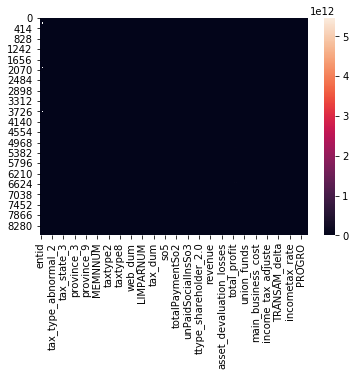

In [77]:
sns.heatmap(totalE)

In [78]:
import numpy as np

# Create correlation matrix
corr_matrix = totalE.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
totalE.drop(to_drop, axis=1, inplace=True)
totalE

,entid,CaseType,cdate,tax_type_abnormal_0,tax_type_abnormal_1,tax_type_abnormal_2,tax_type_abnormal_3,tax_type_abnormal_4,tax_state_0,tax_state_1,...,industry_tax,registertype,economic_type,incometax_rate,collection_type,ASSGRO,VENDINC,PROGRO,NETINC,TOTEQU
0,722691858,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2.0,8.0,192.0,0.166667,2.0,370525.70684,132563.336531,3076.896046,-329.312338,77369.637461
1,705310922,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2.0,19.0,48.0,0.125000,0.0,370525.70684,132563.336531,3076.896046,-329.312338,77369.637461
2,412086145,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2.0,19.0,55.0,0.125000,0.0,370525.70684,132563.336531,3076.896046,-329.312338,77369.637461
3,1116571015,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2.0,8.0,66.0,0.125000,0.0,370525.70684,132563.336531,3076.896046,-329.312338,77369.637461
4,500970908,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2.0,9.0,192.0,0.083333,2.0,370525.70684,132563.336531,3076.896046,-329.312338,77369.637461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8671,876340929,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,19.0,146.0,0.000000,2.0,370525.70684,132563.336531,3076.896046,-329.312338,77369.637461
8672,1202136378,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,8.0,222.0,0.125000,2.0,370525.70684,132563.336531,3076.896046,-329.312338,77369.637461
8673,117440828,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,8.0,23.0,0.125000,0.0,370525.70684,132563.336531,3076.896046,-329.312338,77369.637461
8674,609705973,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,8.0,97.0,0.000000,2.0,370525.70684,132563.336531,3076.896046,-329.312338,77369.637461


In [39]:
totalE['CaseType'].unique()

array([ 2., nan,  3.,  1.,  0.])

In [79]:
totalE.to_csv('total_EDA1.csv',index=False)